/var/folders/jz/ln9hc74976g2g7633sj03qtr0000gn/T/ipykernel_24176/2065281631.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start = '2000-01-01')['Close']
[*********************100%***********************]  6 of 6 completed


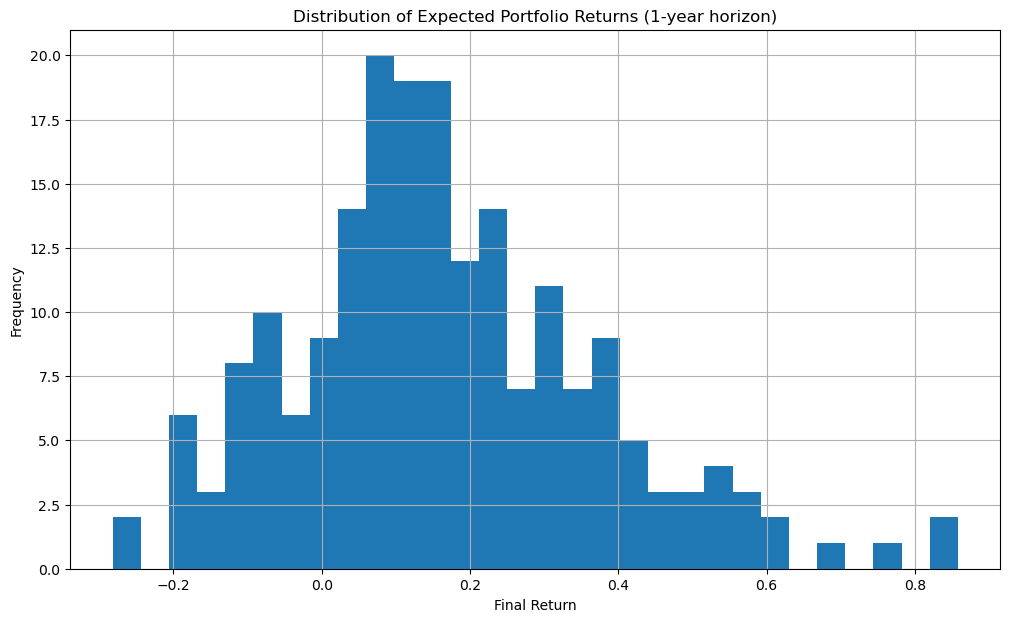

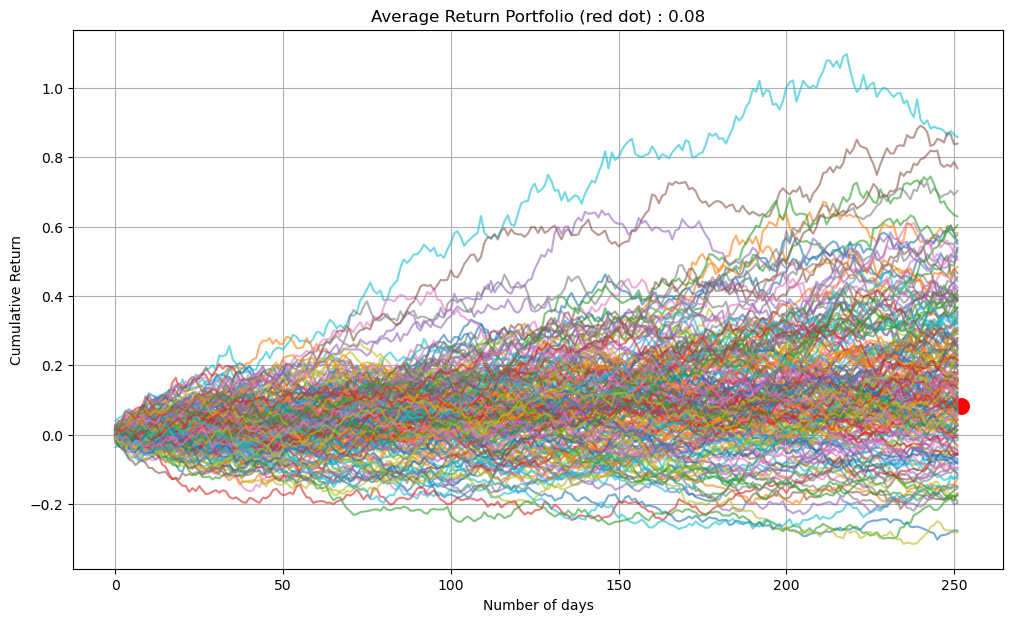

In [183]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

tickers_input = "AI.PA PAEJ.PA PE500.PA PANX.PA ENGI.PA BNP.PA" #input(str('Enter the tickers held in your portfolio : '))
tickers = tickers_input.split() #In order to split the str input into a list of tickers.

weights = np.array([14.58, 16.26, 22.09, 20.61, 19.83, 6.84]) #input('Give the list of weights of your portfolio (as list) : ')
data = yf.download(tickers, start = '2000-01-01')['Close']

returns = data.pct_change().dropna()
mean_ret = returns.mean() #average daily return
sigma = returns.cov() #covariance matrix of assets 


# Monte-Carlo Simulation 
nb_sim = 200 
nb_days = 252 #Forecasting horizon (= 1 trading year).

port_val = []
for s in range(nb_sim): 
    daily_ret = np.random.multivariate_normal(mean_ret, sigma, nb_days) #We simulate a set a random returns for our portfolio
    port_daily_ret = daily_ret @ (weights/100)
    port_ret = (1 + port_daily_ret).cumprod() - 1 
    port_val.append(port_ret) 

port_val = np.array(port_val)
port_mean_ret = port_val.mean()

final_returns = port_val[:,-1]
plt.figure(figsize=(12,7))
plt.hist(final_returns, bins=30)
plt.title("Distribution of Expected Portfolio Returns (1-year horizon)")
plt.xlabel("Final Return")
plt.ylabel("Frequency")
plt.grid()
plt.show()


plt.figure(figsize = (12,7))
plt.plot(port_val.T, alpha = 0.6)
plt.title(f"Average Return Portfolio (red dot) : {port_mean_ret.round(2)}")
plt.ylabel("Cumulative Return", fontsize = 10)
plt.xlabel("Number of days", fontsize = 10)
plt.scatter(nb_days, port_mean_ret, color = 'red', marker = '.', s=500)
plt.grid()
plt.show()